<h2> Unsupervised Pretraining </h2> 

When we do not have much labeled data, but we cannot find a model trained on a similar task. 

If the data you have is unlabelled, you may still be able to perform unsupervised pretraining on it. 

If you can gather plenty of unlabeled training data, you can try to train the layers one by one starting with the lowest layer and going up. 

<h4> Boltzmaan Machine </h4> 

Instead of using a deterministic step function to decide which value to output, these neurons output 1 with some probability, and 0 otherwise.

If we keep a Boltzmaan machine running long enough, the probbility of observing a perticular outcome will only be a function of the connection weights and bias terms, not of the original configuration.

Training a Boltzmann machine means finding the parameters which make the network approximate the training sets probability distribution.

The point where your model no longer depends on its intital state, it has reached thermal equilibrium where there is no thermal gradient to cause any change. This is a generative model.

<h4> Restricted Boltzmaan Machines </h4> 

RBMs are shallow neural networks with only 2 layers and is an unsupervised training method used to find patterns in data by reconstructing the input. It is called restricted because neurons in the same layer are not connected. 

RBMs can be used for both:
- reconstruction of input
- classify instances lacking classification by using the concept that similar neurons will fire in similar inputs. 

Given that you have more unlabelled data, you start off by building your network using only unlabelled data such that your input in the forward pass with be equal to the backward output. Then after training sufficient hidden layers, you feed in labelled data to train the output layer. 


Currently available methods for us to speed up training are:
- Initialization strategy
- Good activation function
- Batch Normalization
- Reusing Pretrained network

<h2> Faster Optimizers </h2> 

<h2> Momentum Optimization </h2> 

It starts out slow and starts increasing speed as it picks up momentum, as it goes down the gradient slope. 

In gradient descent, it simply subtracts the existing theta values by the current gradient. It has no idea of the earlier gradient of the previous step. 

Momentum optimization subtracts the local gradient from the momentum vector(multiplied by m) and it updates the weights by simply adding this momentum vector. 

The gradient vector thats multiplied with the learning rate is used to control the accelerating here. not the speed. Hence a larger negative gradient results in a higher accelaration. 


Momentum optimization can update weights 10 times faster for a typical beta value of 0.9. This means it will not be stuck in plateaus when reaching global minima, hence it can work with non normalized data faster too. 

momentum <= friction * momentum - lr * gradient
weights <= weights + momentum 

Notice we have added a  new parameter to tune in momentum

It is better to think of Momentum optimization with movng averages. 

moving average of gradient <= momentum * moving average of gradient + (1- momentum) * gradient of this batch

Then the moving average of gradient it used to update the weights:

weights <= weights - (alpha * moving average of gradient)

This ensures that we smoothen out any large movements from single step gradient descents. 

<h3> Nesterov Accelerated Gradient </h3> 

Involves measuring the gradient at a few steps ahead of the actual *theta* value we are currently at. Then we multiply this with the learning rate and subtract from momentum vector * friction. 

This works because in general the momentum vector will be pointing in the right direction. hence to accelerate it a bit, it makes sense to measure the gradient a bit further along the momentum vector. 

Given that we are moving along the momentum vector in finding the gradient, there is less oscillations and it will converge faster. 

<h3> AdaGrad </h3> 

When gradient descent occurs, its quickly starts going down the steepest slope and then slows down at the bottom of the valley. If we can initially make it travel towards the global optimum, it would be better.

In AdaGrad we square the gradients into a vector s by doing element wise multiplication of the gradient vector.

Given that the gradient vector consists of gradients with respect to multiple theta dimensions, if the gradient is steep across one particular theta dimension, the squaring of it will make it more steeper allowing it to travel down the slope faster. 

<h3> RMS Prop (Root Mean Square Prop) </h3> 

RMS Prop is very similar to AdaGrad, however it uses the moving average for each minibatch to update its *s* value. 

In both AdaGrad and RMS Prop, we look to smoothen out the gradient descent process. For dimensions with large oscillations, the elementwise squaring in the first step of the algorithm causes the *s* to become large for dimensions with large oscillations, and smaller for dimensions with small oscillations. 

Hence in the 2nd step of the algorithm, when we divide the gradient by the **s** value for a particular dimension, large oscillations are damped down, and the smaller more important oscillations are magnified, leading to faster optimizations. 

<h3> Adam and Nadam Optimization </h3> 

Adam: Adaptive Moment Estimation combines momentum optimization and RMS Prop. 

Just like momentum, it keeps track of exponentially decaying average of past gradients, and like RMSProp, it keeps track of exponentially decaying average of past squared gradients. 


The momentum parameter for decay of gradient is initialized to 0.9, while the hyperparameter for decay of square of gradient is initialized to 0.999. 

Nadam : This is Adam optimizer with the Nesterov trick of finding the gradient a few steps further along the line of momentum.



<h3> Learning rate scheduling </h3> 

Instead of starting with a large learning rate and dividing it by 3, we can start with a high learning rate, and reduce it once it stops making fast progress. These strategies are called learning schedules. 

Power Scheduling: 
Here we set the learning rate to reduce at each iteration. The function of learning rate will be equal to the iteration number. 

Exponent scheduling:
Set the learning rate to exponential decay of the initial learning rate, where the nate gets decreased by a factor of 10 every *s* steps. 
(Power Scheduling decreases the learning rate much more slowly as compared to Exponent scheduling)

Piecewise constant scheduling:
Here we pre set learning rates for ranges of epochs. This is difficulat as we need to find the appropriate number of epochs to spread a learning rate through. 

Performance scheduling: Measure the validation error every N steps(just like for early stopping) and reduce the learning rate by a factor of lambda. 





In [2]:
#creating a learning rate scheduler 
#Exponential Scheduler
import tensorflow as tf
from tensorflow import keras

In [3]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0*0.1**(t/s)
    return exponential_decay_fn

In [4]:
#create the custom learning rate scheduler with the LearningRateScheduler Class of keras
exponential_decay_fn = exponential_decay(lr0 = 0.01, s = 20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

The above object is used as a callback in the fit method of the model. 

A learning rate scheduler will update the optimizer's learning_rate at the beginning of each epoch. 

In [5]:
#updating learning rate at every iteration than each epoch
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s = 40000):
        super().__init__()
        self.s = s
    def on_batch_begin(self, batch, logs = None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr*0.1**(1/s))
    def on_epoch_end(self,epoch, logs = None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)


If your batch_size = 32, epochs = 20, given that the entire training set is used to randomly select from in each epoch, and then it iterates through the entire batch as it uses SGD, at each step inside the epoch, we need to update the learning rate. 

Hence we need to calculate the number of steps in the epoch. 

s = 20*len(X_train)//32

In [10]:
#or else we may do it using Keras itself
#s = 20* len(X_train) //32
s = 40000
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s , 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

Easiest way to use learning rate scheduling is:

1) use keras.optimizers.SGD(lr = xx, decay = xx)(Power scheduling)


2) create your function which returns a learning rate decay function, then attach, then use it in "keras.callbacks.LearningRateScheduler(decay_fcn)". Then use it as a callback in the model.function




<h3> Adam Optimization Algorithm in more detail </h3> 

In this algorithm, we maintain the first and second moment of the gradient. The first moment in the exponentially decaying mean gradient(moving mean of your gradient) and the second moment is the variance (the momving mean of the square of your gradient)

<h3> First </h3> 

Maintain a moment vector and exponentially weighted infinity norm for each parameter thats being optimized. They are all initialized to 0 at the start of the search. 

mean = 0
square of gradient = 0

1) The gradient for the current set of weights is calculated

2) The moving mean for the gradient is updated

3) The moving square of the gradient is updated

4) Next both the moving mean and moving square moments are bias corrected. 

5) Note that with each iteration, the Beta1 and Beta2 values are also decayed. 

6) Finally the new set of weights is calculated by 

x(t) = x(t-1) – alpha * mhat(t) / (sqrt(vhat(t)) + eps)


In [11]:
#a simple optimization function
def objective(x,y):
    return x**2 + y**2

In [12]:
import numpy as np
from numpy import arange
from numpy import meshgrid
import matplotlib.pyplot as plt

In [18]:
#input range
r_min, r_max = -1.0,1.0

#sample input range informly
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
#meshgrid for inputs
X,y = meshgrid(xaxis,yaxis)

In [19]:
results = objective(X,y)

In [20]:
results

array([[2.00000000e+00, 1.81000000e+00, 1.64000000e+00, 1.49000000e+00,
        1.36000000e+00, 1.25000000e+00, 1.16000000e+00, 1.09000000e+00,
        1.04000000e+00, 1.01000000e+00, 1.00000000e+00, 1.01000000e+00,
        1.04000000e+00, 1.09000000e+00, 1.16000000e+00, 1.25000000e+00,
        1.36000000e+00, 1.49000000e+00, 1.64000000e+00, 1.81000000e+00],
       [1.81000000e+00, 1.62000000e+00, 1.45000000e+00, 1.30000000e+00,
        1.17000000e+00, 1.06000000e+00, 9.70000000e-01, 9.00000000e-01,
        8.50000000e-01, 8.20000000e-01, 8.10000000e-01, 8.20000000e-01,
        8.50000000e-01, 9.00000000e-01, 9.70000000e-01, 1.06000000e+00,
        1.17000000e+00, 1.30000000e+00, 1.45000000e+00, 1.62000000e+00],
       [1.64000000e+00, 1.45000000e+00, 1.28000000e+00, 1.13000000e+00,
        1.00000000e+00, 8.90000000e-01, 8.00000000e-01, 7.30000000e-01,
        6.80000000e-01, 6.50000000e-01, 6.40000000e-01, 6.50000000e-01,
        6.80000000e-01, 7.30000000e-01, 8.00000000e-01, 8.9000

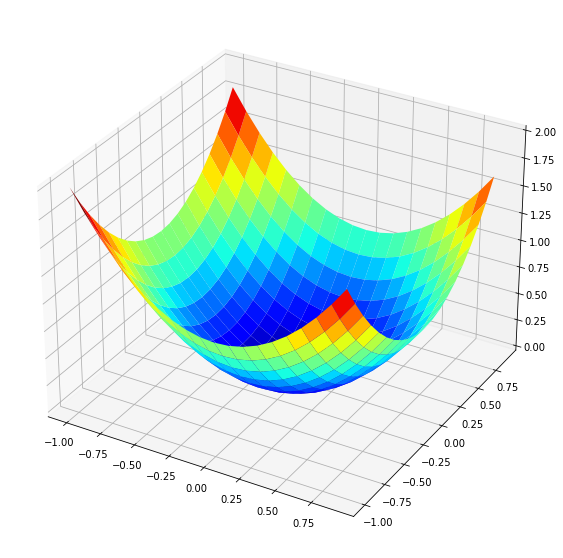

In [26]:
fig = plt.figure(figsize = (10,10))
axis = fig.gca(projection = '3d')
axis.plot_surface(X,y,results, cmap = 'jet')
plt.show()

In [27]:
from numpy import asarray

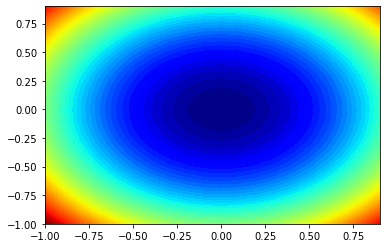

In [31]:
plt.contourf(X,y,results, levels = 50, cmap = 'jet')

In [54]:
#derivative function for the test optimization function:
def derivative(x,y):
    return asarray([x*2, y*2])

In [158]:
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

In [159]:
x = bounds[:,0] + np.random.rand(len(bounds))*(bounds[:,1]-bounds[:,0])

In [160]:
score = objective(x[0],x[1])

In [161]:
score

0.16415550431932074

In [162]:
#initializing the first and second moments to zero
#we have 2 parameters in bound, hence m and v will also have 2 elements in them 
m = [0.0 for _ in range(bounds.shape[0])]
v = [0.0 for _ in range(bounds.shape[0])]

We then run the fixed number of iteratin of the algorithm thats defined by n_iter 

First calculate the gradient using your derivative function
g = derivative(x[0],x[1])
Here x is a point that is being considered with 2 parameters in it
Note that g will have a derivative with respect to each parameter in x. 

Note that x will have the same number of parameters as m and v. 
Parameters in m represent the moving mean of the gradient with respect to the parameter in x.
Parameters in v represent the moving mean of the square of the gradient with respect to the parameter in v.


We loop through each gradient with respect to a particular parameter and update the moving mean, moving variance, bias corrected values for each parameter. 

In [56]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps = 1e-8):
    #generating initial set of random parameters
    x = bounds[:,0] + np.random.rand(len(bounds))*(bounds[:,1] - bounds[:,0])
    #apply the objective function
    score = objective(x[0],x[1])
    #initialize m and v(first and second moments)
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    for t in range(n_iter):
        #calculate the derivative with respect to each parameter
        g = derivative(x[0],x[1])
        for i in range(x.shape[0]):
            m[i] = beta1*m[i] + (1.0 - beta1)*g[i]
            v[i] = beta2*v[i] + (1.0 - beta2)*g[i]**2
            #(t+1) because t is 0 in the first loop
            #correcting for bias 
            mhat = m[i]/(1.0 - beta1**(t + 1))
            vhat = v[i]/(1.0 - beta2**(t + 1))
            x[i] = x[i] - alpha*mhat/(np.sqrt(vhat) + eps)
        score = objective(x[0],x[1])
        print('>{} f({},{}) = {}'.format(t, x[0],x[1],score))
    return [x,score]

In [57]:
def adam_vectorized(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps = 1e-8):
    #generating initial set of random parameters
    x = bounds[:,0] + np.random.rand(len(bounds))*(bounds[:,1] - bounds[:,0])
    #apply the objective function
    score = objective(x[0],x[1])
    #initialize m and v(first and second moments)
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    for t in range(n_iter):
        #calculate the derivative with respect to each parameter
        g = derivative(x[0],x[1])
        #for i in range(x.shape[0]):
        m = np.multiply(beta1,m) + np.multiply((1.0 - beta1),g)
        v = np.multiply(beta2,v) + np.multiply((1.0 - beta2),np.square(g))
            #(t+1) because t is 0 in the first loop
            #correcting for bias 
        mhat = np.divide(m,(1.0 - beta1**(t + 1)))
        vhat = np.divide(v,(1.0 - beta1**(t + 1)))
        x = x - np.divide(np.multiply(alpha,mhat),(np.sqrt(vhat) + eps))
        score = objective(x[0],x[1])
        print('>{} f({},{}) = {}'.format(t, x[0],x[1],score))
    return [x,score]